In [1]:
# 2023.03.02

1. MAPE가 튀는 모델이 예측한 Target 리스트
2. 리스트에 수록된 Target에 대한 Line plot

In [2]:
from google.colab import drive
drive.mount("/content/mydrive/")
%cd /content/mydrive/MyDrive/LTSF_Linear

import os
from _data_provider.data_loader_wq import get_ydata

import matplotlib.pyplot as plt
import seaborn as sns

root_path = "dataset/Water_Week"
dir_list = sorted(os.listdir(root_path))

Mounted at /content/mydrive/
/content/mydrive/MyDrive/LTSF_Linear


In [3]:
target_dic = {
            'D001청주정': ["2-MIB", "Geosmin", "blue-green_algae"],
            'D002구미': ["blue-green_algae", "diatomeae"],
            'D003고령': ["diatomeae"],
            'E003본포': ["blue-green_algae", "diatomeae"],
            'E004남강': ["2-MIB"]
            }
target_dic

{'D001청주정': ['2-MIB', 'Geosmin', 'blue-green_algae'],
 'D002구미': ['blue-green_algae', 'diatomeae'],
 'D003고령': ['diatomeae'],
 'E003본포': ['blue-green_algae', 'diatomeae'],
 'E004남강': ['2-MIB']}

In [4]:
for key in target_dic:
    print(key)
    for target in target_dic[key]:
        print(target)

D001청주정
2-MIB
Geosmin
blue-green_algae
D002구미
blue-green_algae
diatomeae
D003고령
diatomeae
E003본포
blue-green_algae
diatomeae
E004남강
2-MIB


In [5]:
def get_figures(target_dic:dict):
    figures = []
    for key in target_dic:
        _, _, df_target = get_ydata(root_path, key)
        for target in target_dic[key]:
            fig = plt.figure(figsize=(10, 7))
            sns.lineplot(x=df_target.index, y=target, data=df_target)
            plt.ylabel(target)
            plt.title(f"{key[:4]} {target}")
            figures.append(fig)
    return figures

In [6]:
def save_figures(save_path:str, figures:list):
    for i, fig in enumerate(figures):
        fig.savefig(f"{save_path}/figures_{i}.png")
    print(f"Your figures has been saved at {save_path}.")

Your figures has been saved at _figures.


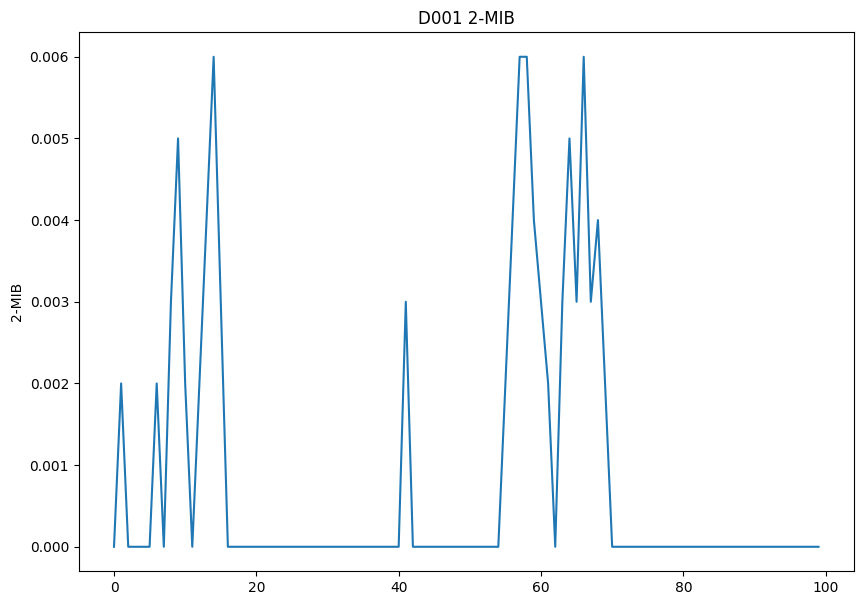

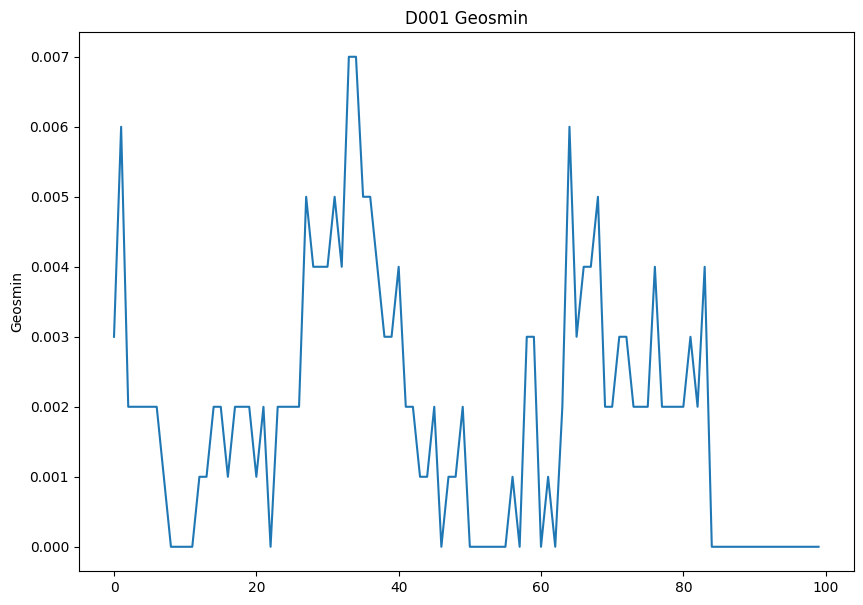

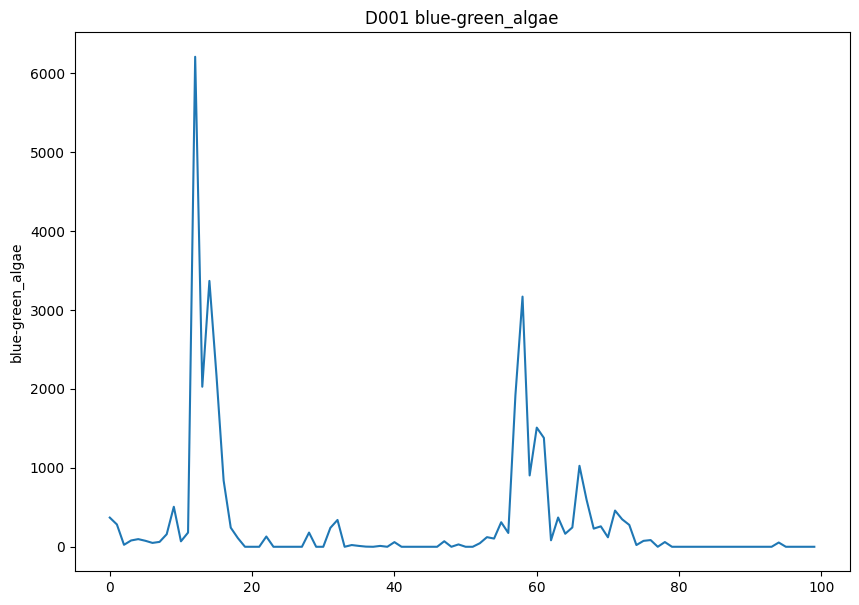

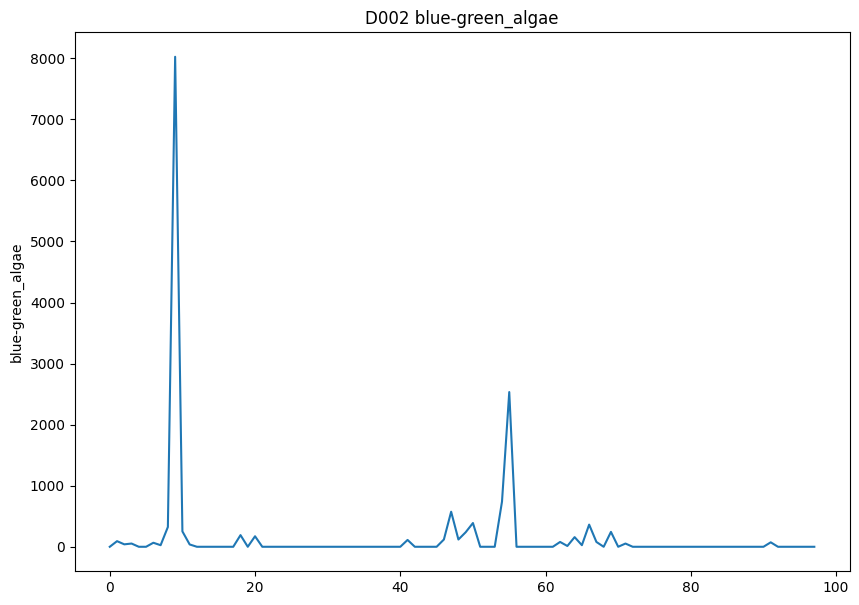

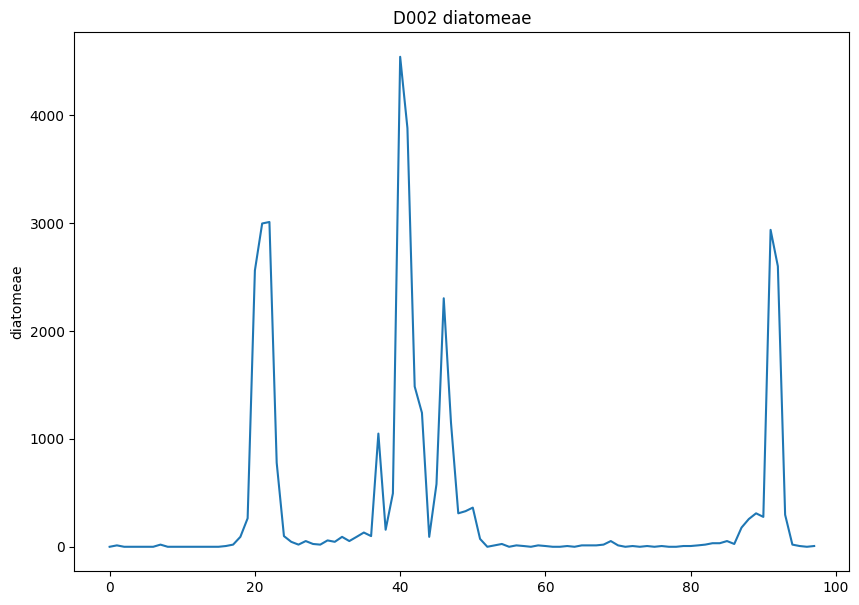

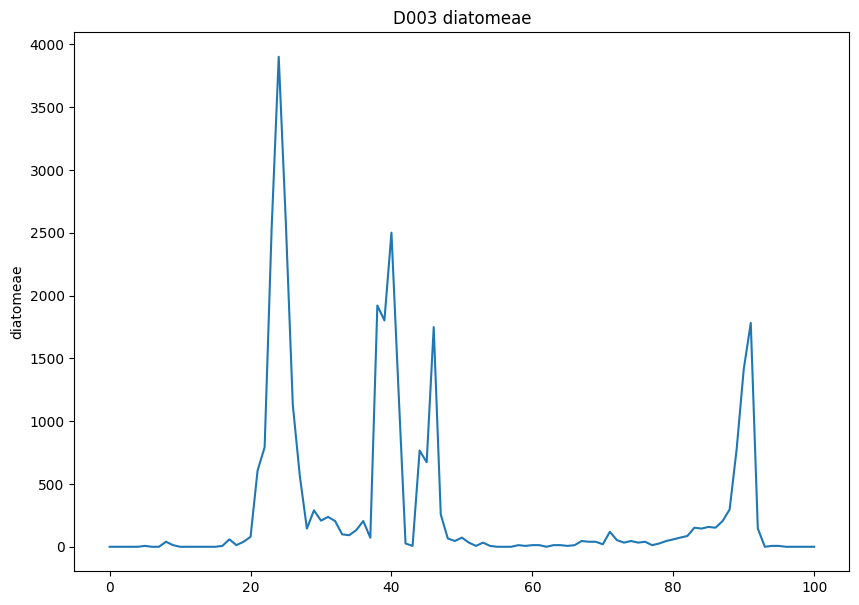

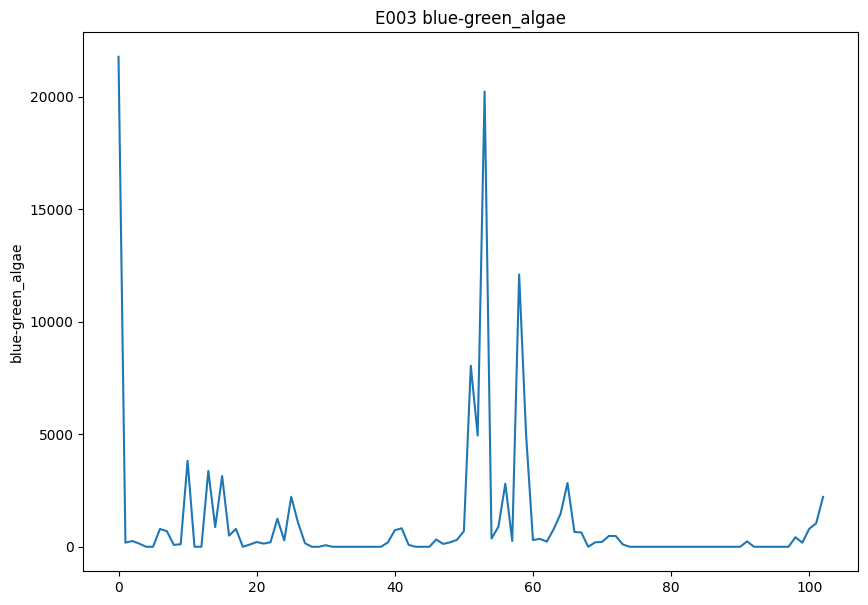

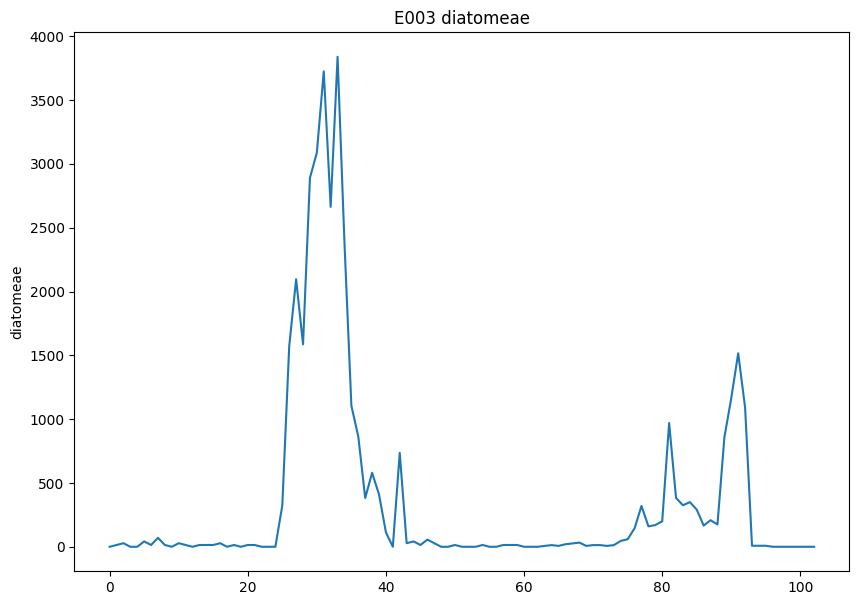

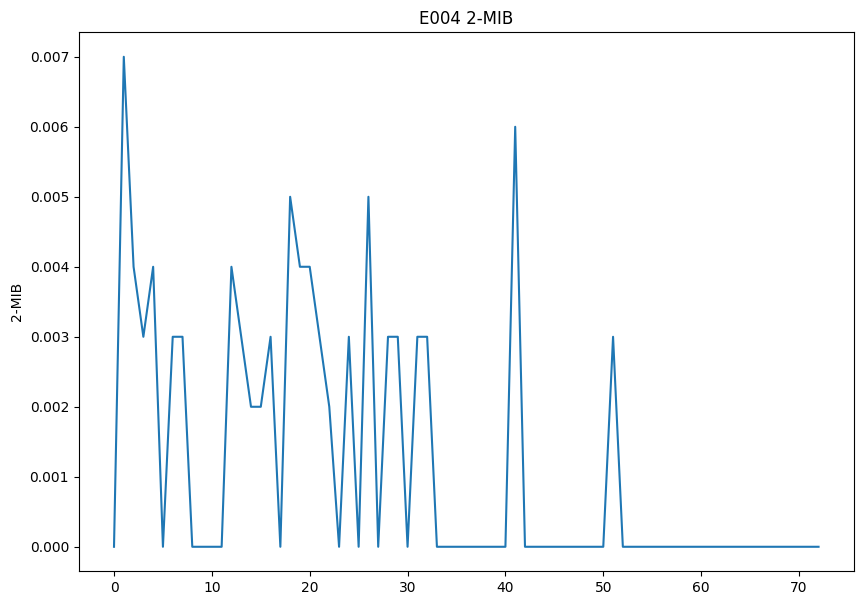

In [7]:
figures = get_figures(target_dic)
save_figures("_figures", figures)